# **Student Performance Indicator - DATA ANALYSIS**

**FEATURES DESCRIPTION**

**gender : sex of students -> (Male/female)**

**race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)**

**parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)**

**lunch : having lunch before test (standard or free/reduced)**

**test preparation course : complete or not complete before test**

**math score**

**reading score**

**writing score**

# **Importing Required Libraries and Read the Dataset**

In [1]:
#  Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving stud.csv to stud.csv


In [3]:
# Create Dataframe and Read the dataset using Pandas
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **Observation**

In [4]:
df.shape

(1000, 8)

**IN this data set there is 1000 rows and 8 columns**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**There is both object and integers values in he dataset**

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There is no missing data**

In [7]:

df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

**There are no duplicates values in the dataset**

In [9]:
## Checking the number of uniques values of each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# **Descriptive Statistics & DATA PREPROCESSING**

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**From the above description of numerical data,all means are very close to each other- between 66 and 69**

**All the standard deviation are also close- between 14.6- 15.19**

**While there is a minimum of 0 for maths,other are having 17 and 10 value**

In [11]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


In [12]:
#segrregate numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [13]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [14]:
categorical_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [15]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [16]:
df['race_ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

In [17]:
df['parental_level_of_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [18]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [19]:
df['test_preparation_course'].value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

In [20]:
## Aggregate the total score with mean

df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# **Data Visualization**

<Axes: xlabel='average', ylabel='Count'>

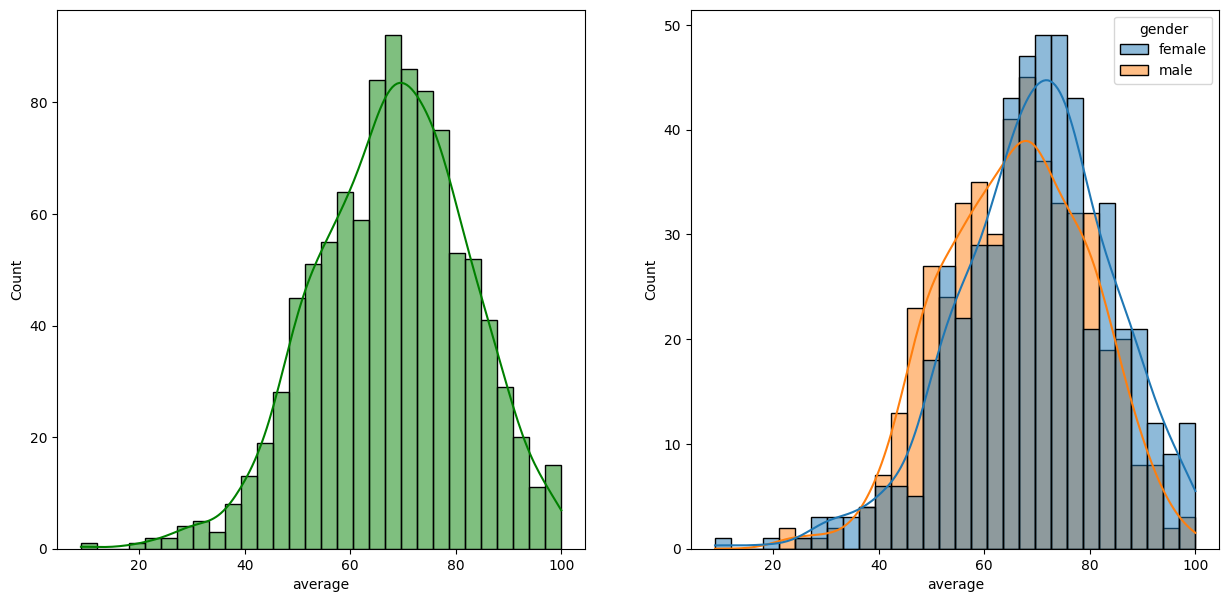

In [21]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

**Female student tend to perform well than male students**

<ipython-input-22-8fe43401f593>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-22-8fe43401f593>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-22-8fe43401f593>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<Axes: xlabel='average', ylabel='Count'>

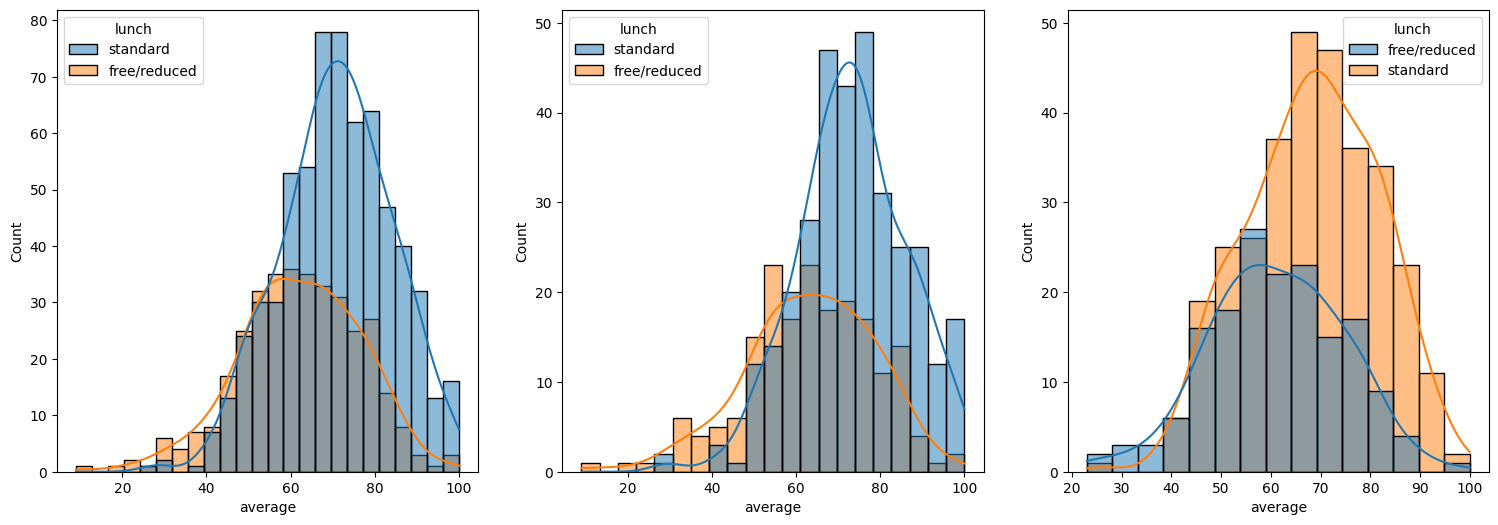

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

**Standard Lunch help students perform well in exams**

**Standard lunch helps perform well in exams be it a male of female**

<ipython-input-23-9b52f9013ca3>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-23-9b52f9013ca3>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-23-9b52f9013ca3>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<Axes: xlabel='average', ylabel='Count'>

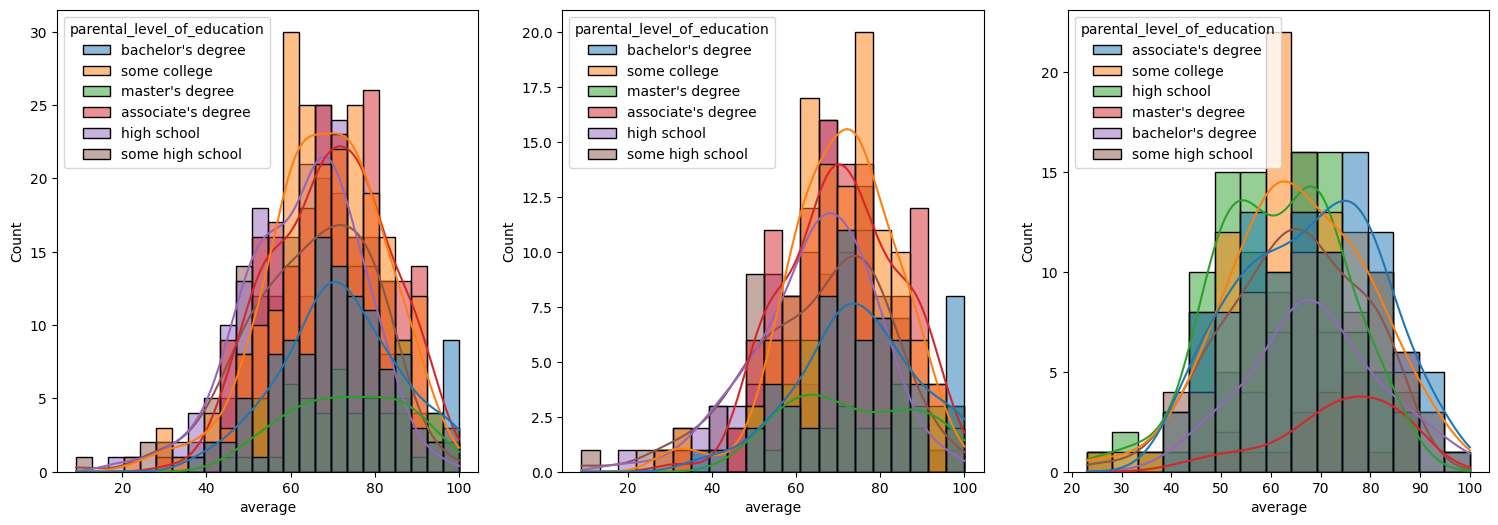

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')

**In general parent's education don't help student perform well in exam**

**3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam**

**2nd plot we can see there is no effect of parent's education on female students**

<ipython-input-24-b5e2189c6cd2>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-24-b5e2189c6cd2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-24-b5e2189c6cd2>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


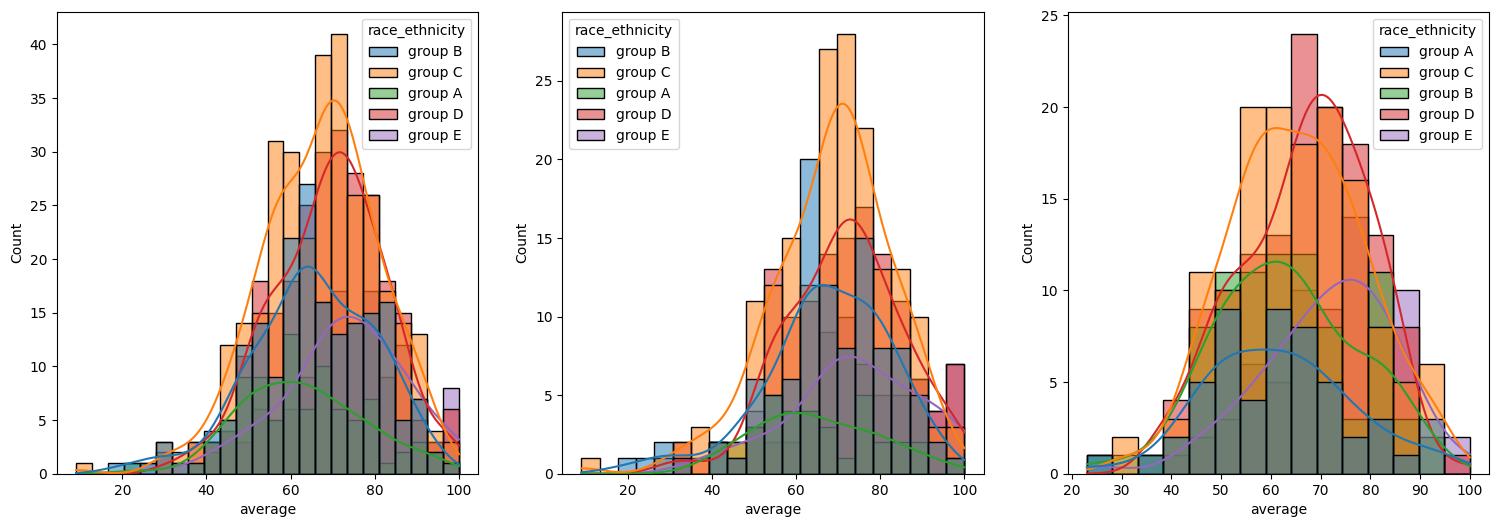

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

**Students of group A and group B tends to perform poorly in exam**

**Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female**

<ipython-input-25-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

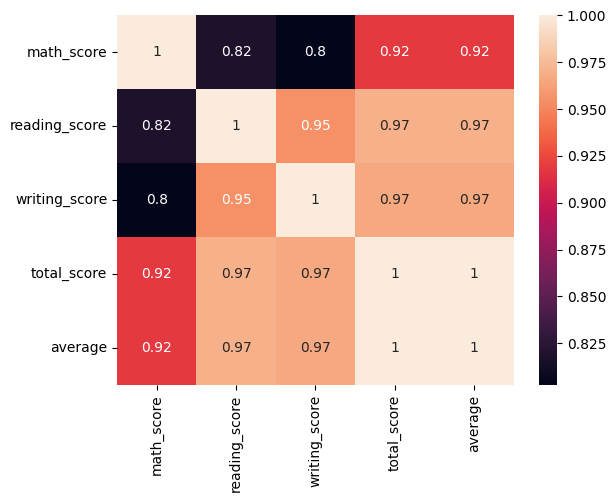

In [25]:
sns.heatmap(df.corr(),annot=True)

# **Feature Wise Visualization**

<Axes: xlabel='gender', ylabel='count'>

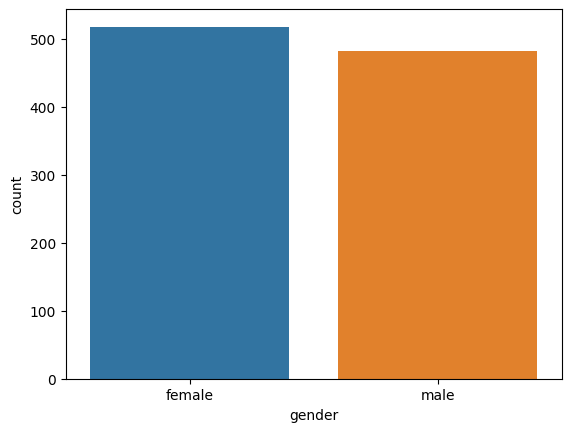

In [26]:
sns.countplot(data=df, x=df['gender'])

([<matplotlib.patches.Wedge at 0x7f8da6c25180>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Male'),
  Text(0.06782226650507357, -1.1980818587083752, 'Female')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

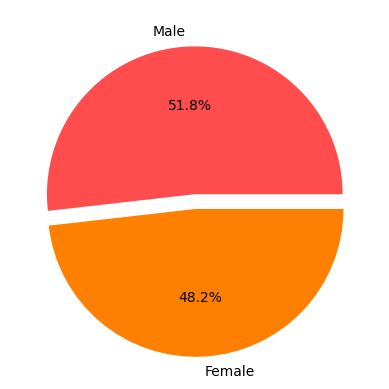

In [27]:
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',colors=['#ff4d4d','#ff8000'])

**Gender has balanced data with female students are 48% and male students are 52%**

<Axes: xlabel='race_ethnicity', ylabel='count'>

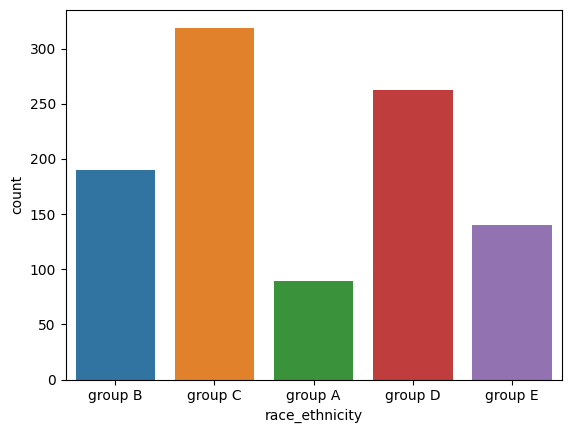

In [28]:
sns.countplot(data=df, x=df['race_ethnicity'])

([<matplotlib.patches.Wedge at 0x7f8da6acbeb0>,
 [Text(0.6461719988148862, 1.0111685062083247, 'group C'),
  Text(-1.1412678264979264, 0.3708203718792959, 'group D'),
  Text(-0.5380598657352365, -1.0726097057574016, 'group B'),
  Text(0.6493454908364958, -1.009133506296521, 'group E'),
  Text(1.1533985045343034, -0.33116746479392106, 'group A')],
 [Text(0.3769336659753503, 0.5898482952881894, '31.9%'),
  Text(-0.6657395654571236, 0.21631188359625594, '26.2%'),
  Text(-0.31386825501222126, -0.6256889950251507, '19.0%'),
  Text(0.37878486965462255, -0.5886612120063038, '14.0%'),
  Text(0.6728157943116768, -0.19318102112978724, '8.9%')])

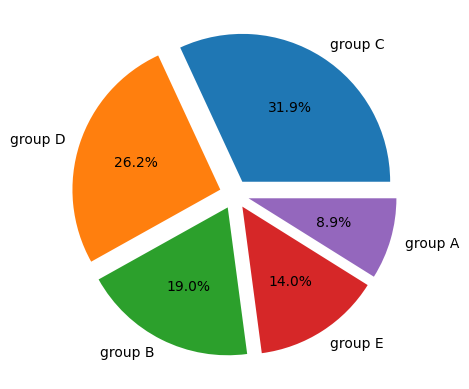

In [29]:
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%')

**Most of the student belonging from group C /group D**

**Lowest number of students belong to group A**

Text(0.5, 1.0, 'Writing_score')

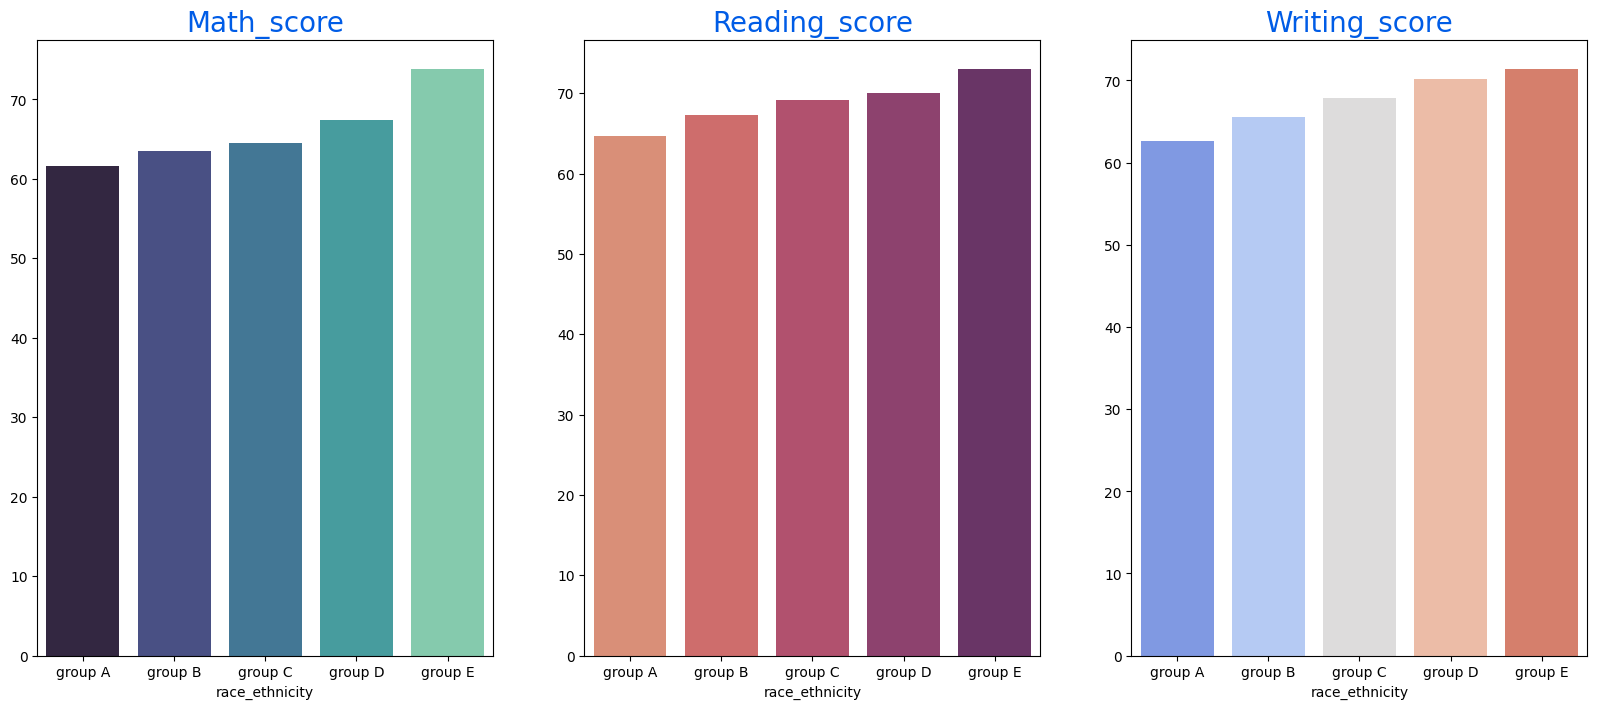

In [30]:
Group_data = df.groupby('race_ethnicity')
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data['math_score'].mean().index,y=Group_data['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

sns.barplot(x=Group_data['reading_score'].mean().index,y=Group_data['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

sns.barplot(x=Group_data['writing_score'].mean().index,y=Group_data['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)


**Group E students have scored the highest marks**

**Group A students have scored the lowest marks**

**Students from Group A have a lower avg in all course subjects**

<Axes: xlabel='parental_level_of_education', ylabel='count'>

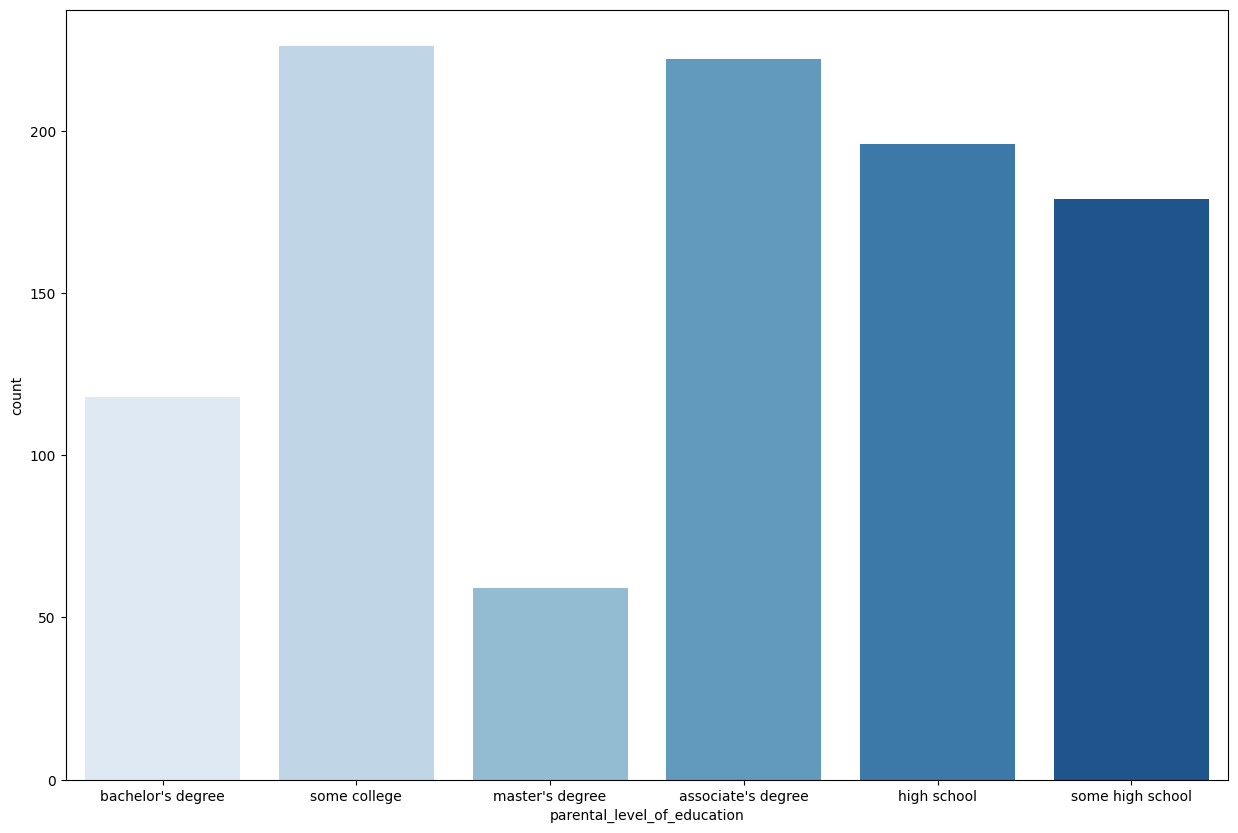

In [31]:
plt.subplots(figsize=(15,10))
sns.countplot(data=df,x=df['parental_level_of_education'], palette = 'Blues')

**Largest number of parents are from some college**

<Axes: xlabel='lunch', ylabel='count'>

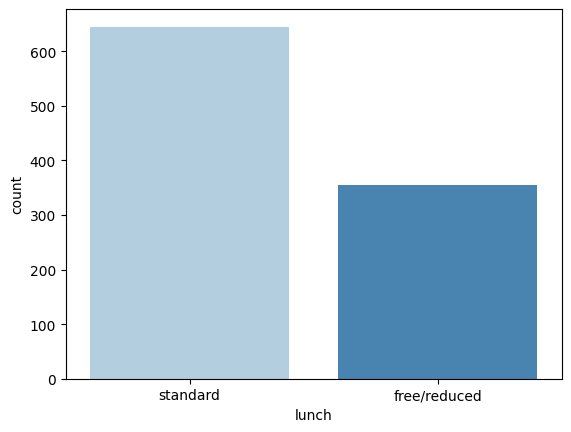

In [32]:
sns.countplot(data=df,x=df['lunch'], palette = 'Blues')

**Students being served Standard lunch was more than free lunch**

<Axes: xlabel='parental_level_of_education', ylabel='count'>

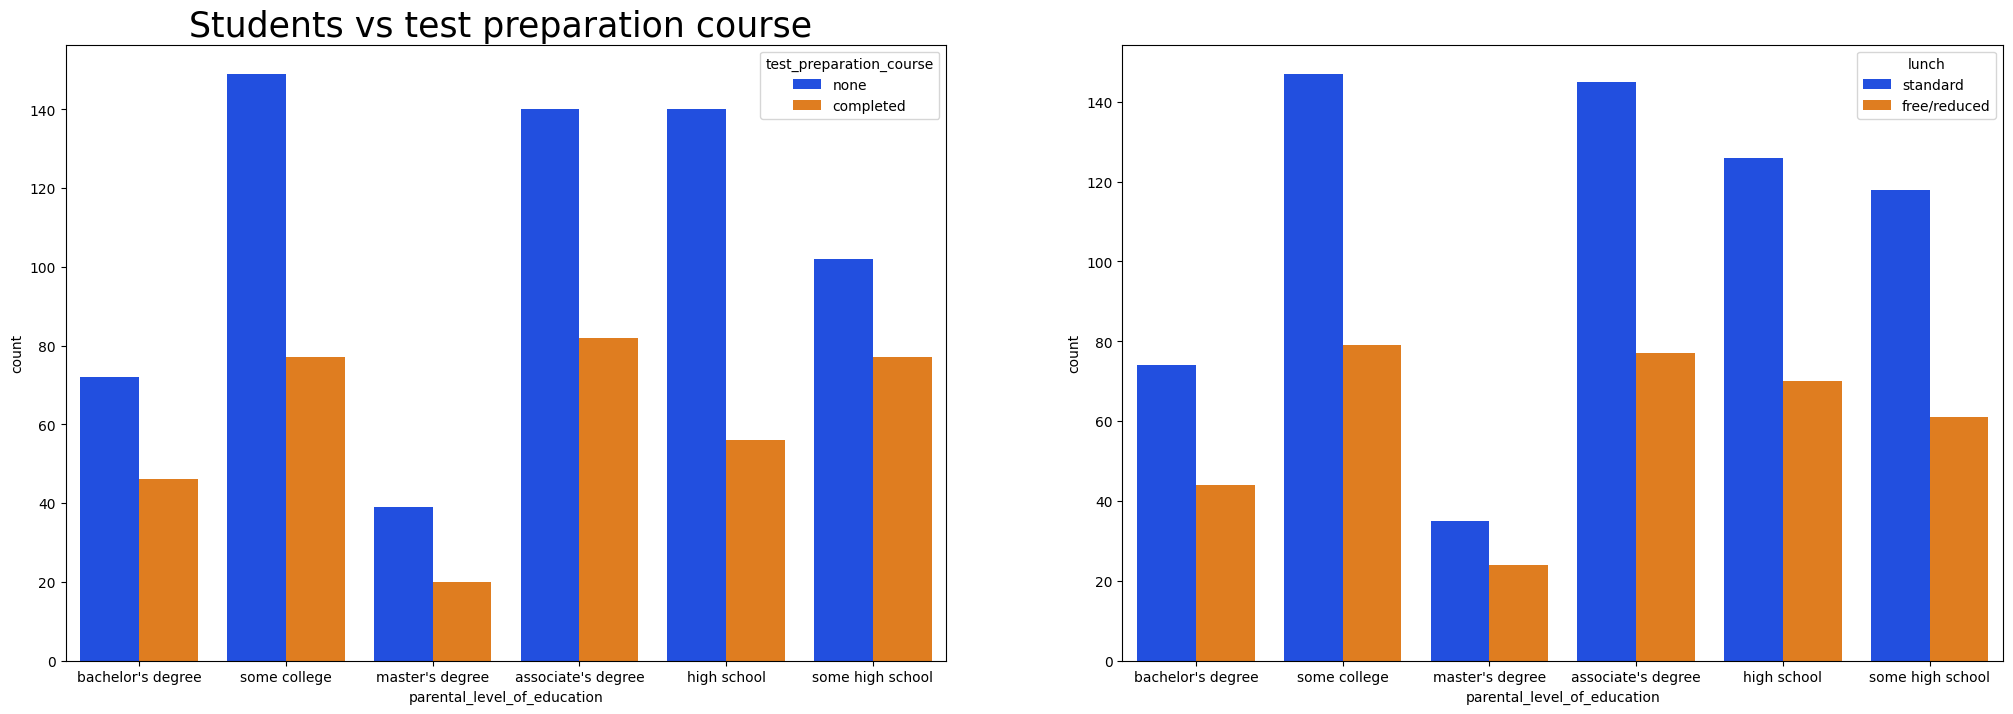

In [33]:
f,ax=plt.subplots(1,2,figsize=(25,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',ax=ax[1])

**Students who get Standard Lunch tend to perform better than students who got free/reduced lunch**

<Axes: xlabel='lunch', ylabel='total_score'>

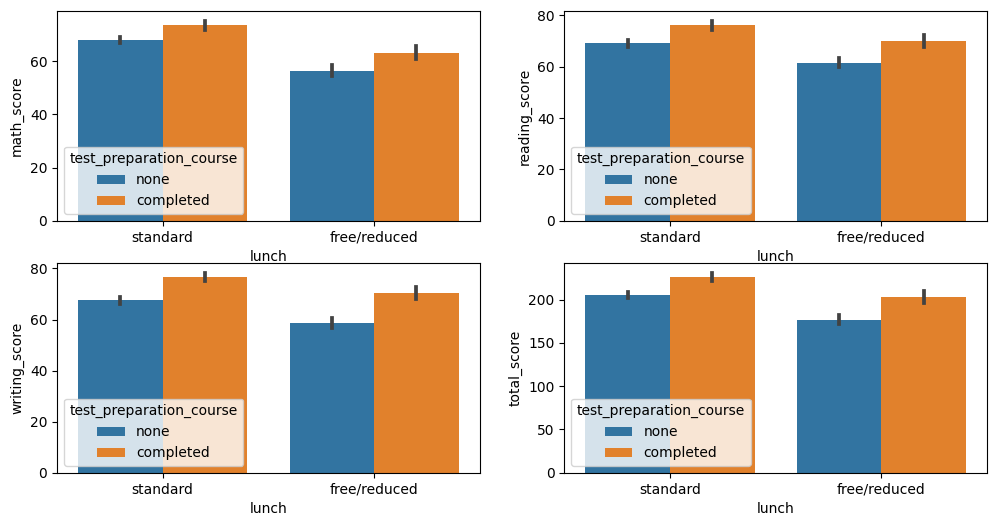

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,4)
sns.barplot (x=df['lunch'], y=df['total_score'], hue=df['test_preparation_course'])

**Students who have completed the Test Prepration Course have scores higher in all categories than those who haven't taken the course**

# **CHECKING OUTLIERS**

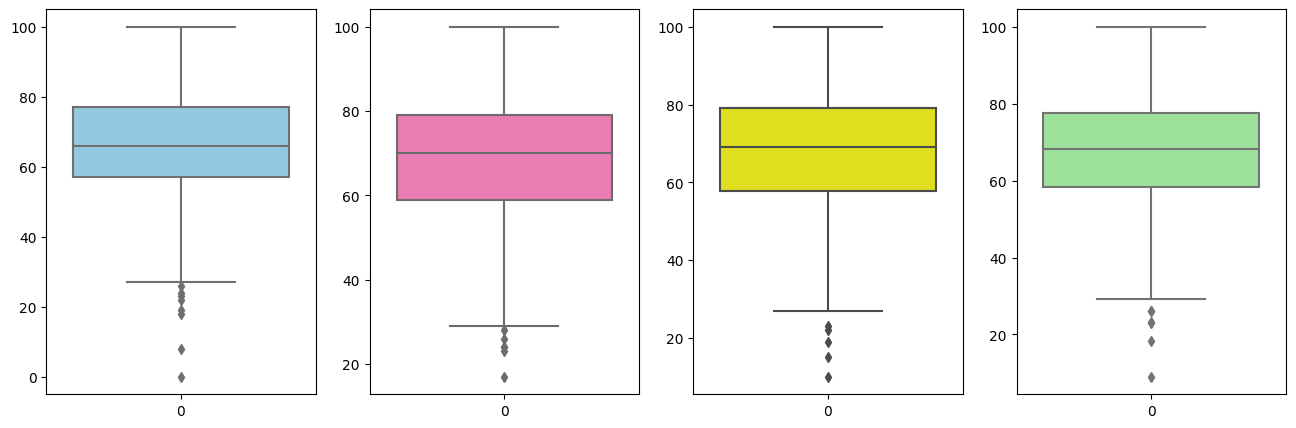

In [35]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

# **Feature Engineering & EDA**

In [36]:
from sklearn.preprocessing import LabelEncoder
Labelencoder= LabelEncoder()
df['gender']=Labelencoder.fit_transform(df['gender'])
df['race_ethnicity']=Labelencoder.fit_transform(df['race_ethnicity'])
df['parental_level_of_education']=Labelencoder.fit_transform(df['parental_level_of_education'])
df['lunch']=Labelencoder.fit_transform(df['lunch'])
df['test_preparation_course']=Labelencoder.fit_transform(df['test_preparation_course'])

In [37]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,0,1,1,1,1,72,72,74,218,72.666667
1,0,2,4,1,0,69,90,88,247,82.333333
2,0,1,3,1,1,90,95,93,278,92.666667
3,1,0,0,0,1,47,57,44,148,49.333333
4,1,2,4,1,1,76,78,75,229,76.333333


In [38]:
df['test_preparation_course'].value_counts()

1    642
0    358
Name: test_preparation_course, dtype: int64

**by label encoding this will label 0 for none and 1 for completed**

In [39]:
df['lunch'].value_counts()

1    645
0    355
Name: lunch, dtype: int64

**by label encoding this will label 0 for free/reduced and 1 for standard**

In [40]:
df['parental_level_of_education'].value_counts()

4    226
0    222
2    196
5    179
1    118
3     59
Name: parental_level_of_education, dtype: int64

**by label encoding this will label 0 for associate's degree**

**by label encoding this will label 1 for bachelor's degree**

**by label encoding this will label 2 for high school**

**by label encoding this will label 3 for master's degree**

**by label encoding this will label 4 for some college**

**by label encoding this will label 5 for some high school**


In [41]:
df['race_ethnicity'].value_counts()

2    319
3    262
1    190
4    140
0     89
Name: race_ethnicity, dtype: int64

**by label encoding this will label 0  for group A** 

**by label encoding this will label 1  for group B** 

**by label encoding this will label 2  for group C** 

**by label encoding this will label 3  for group D** 

**by label encoding this will label 4  for group E**

In [42]:
df['gender'].value_counts()

0    518
1    482
Name: gender, dtype: int64

**by label encoding this will label 0 for Female**

**by label encoding this will label 1 for male**

In [43]:
df.describe()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,2.174000,2.486000,0.645000,0.642000,66.08900,69.169000,68.054000,203.312000,67.770667
std,0.499926,1.157179,1.829522,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,9.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,58.333333
50%,0.000000,2.000000,2.000000,1.000000,1.000000,66.00000,70.000000,69.000000,205.000000,68.333333
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,77.666667
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,100.000000


In [44]:
df.corr()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,0.167982,-0.244313,-0.301225,-0.130861,-0.130861
race_ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.216415,0.145253,0.165691,0.185168,0.185168
parental_level_of_education,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.068279,-0.072444,-0.084299,-0.078883,-0.078883
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,0.350877,0.229560,0.245769,0.290064,0.290064
test_preparation_course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.177702,-0.241780,-0.312946,-0.256710,-0.256710
math_score,0.167982,0.216415,-0.068279,0.350877,-0.177702,1.000000,0.817580,0.802642,0.918746,0.918746
reading_score,-0.244313,0.145253,-0.072444,0.229560,-0.241780,0.817580,1.000000,0.954598,0.970331,0.970331
writing_score,-0.301225,0.165691,-0.084299,0.245769,-0.312946,0.802642,0.954598,1.000000,0.965667,0.965667
total_score,-0.130861,0.185168,-0.078883,0.290064,-0.256710,0.918746,0.970331,0.965667,1.000000,1.000000
average,-0.130861,0.185168,-0.078883,0.290064,-0.256710,0.918746,0.970331,0.965667,1.000000,1.000000


<Axes: >

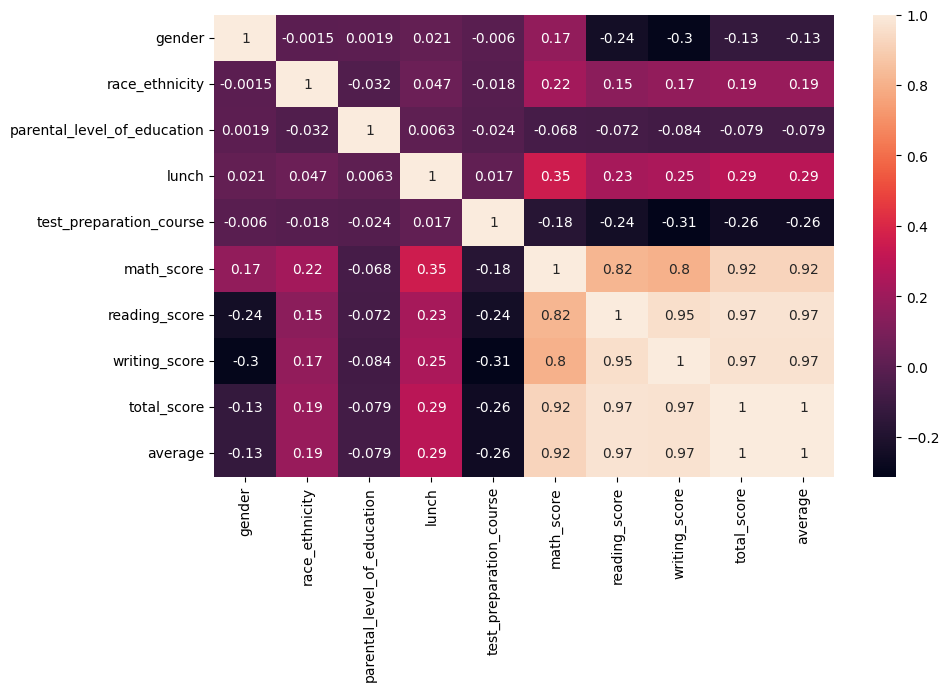

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

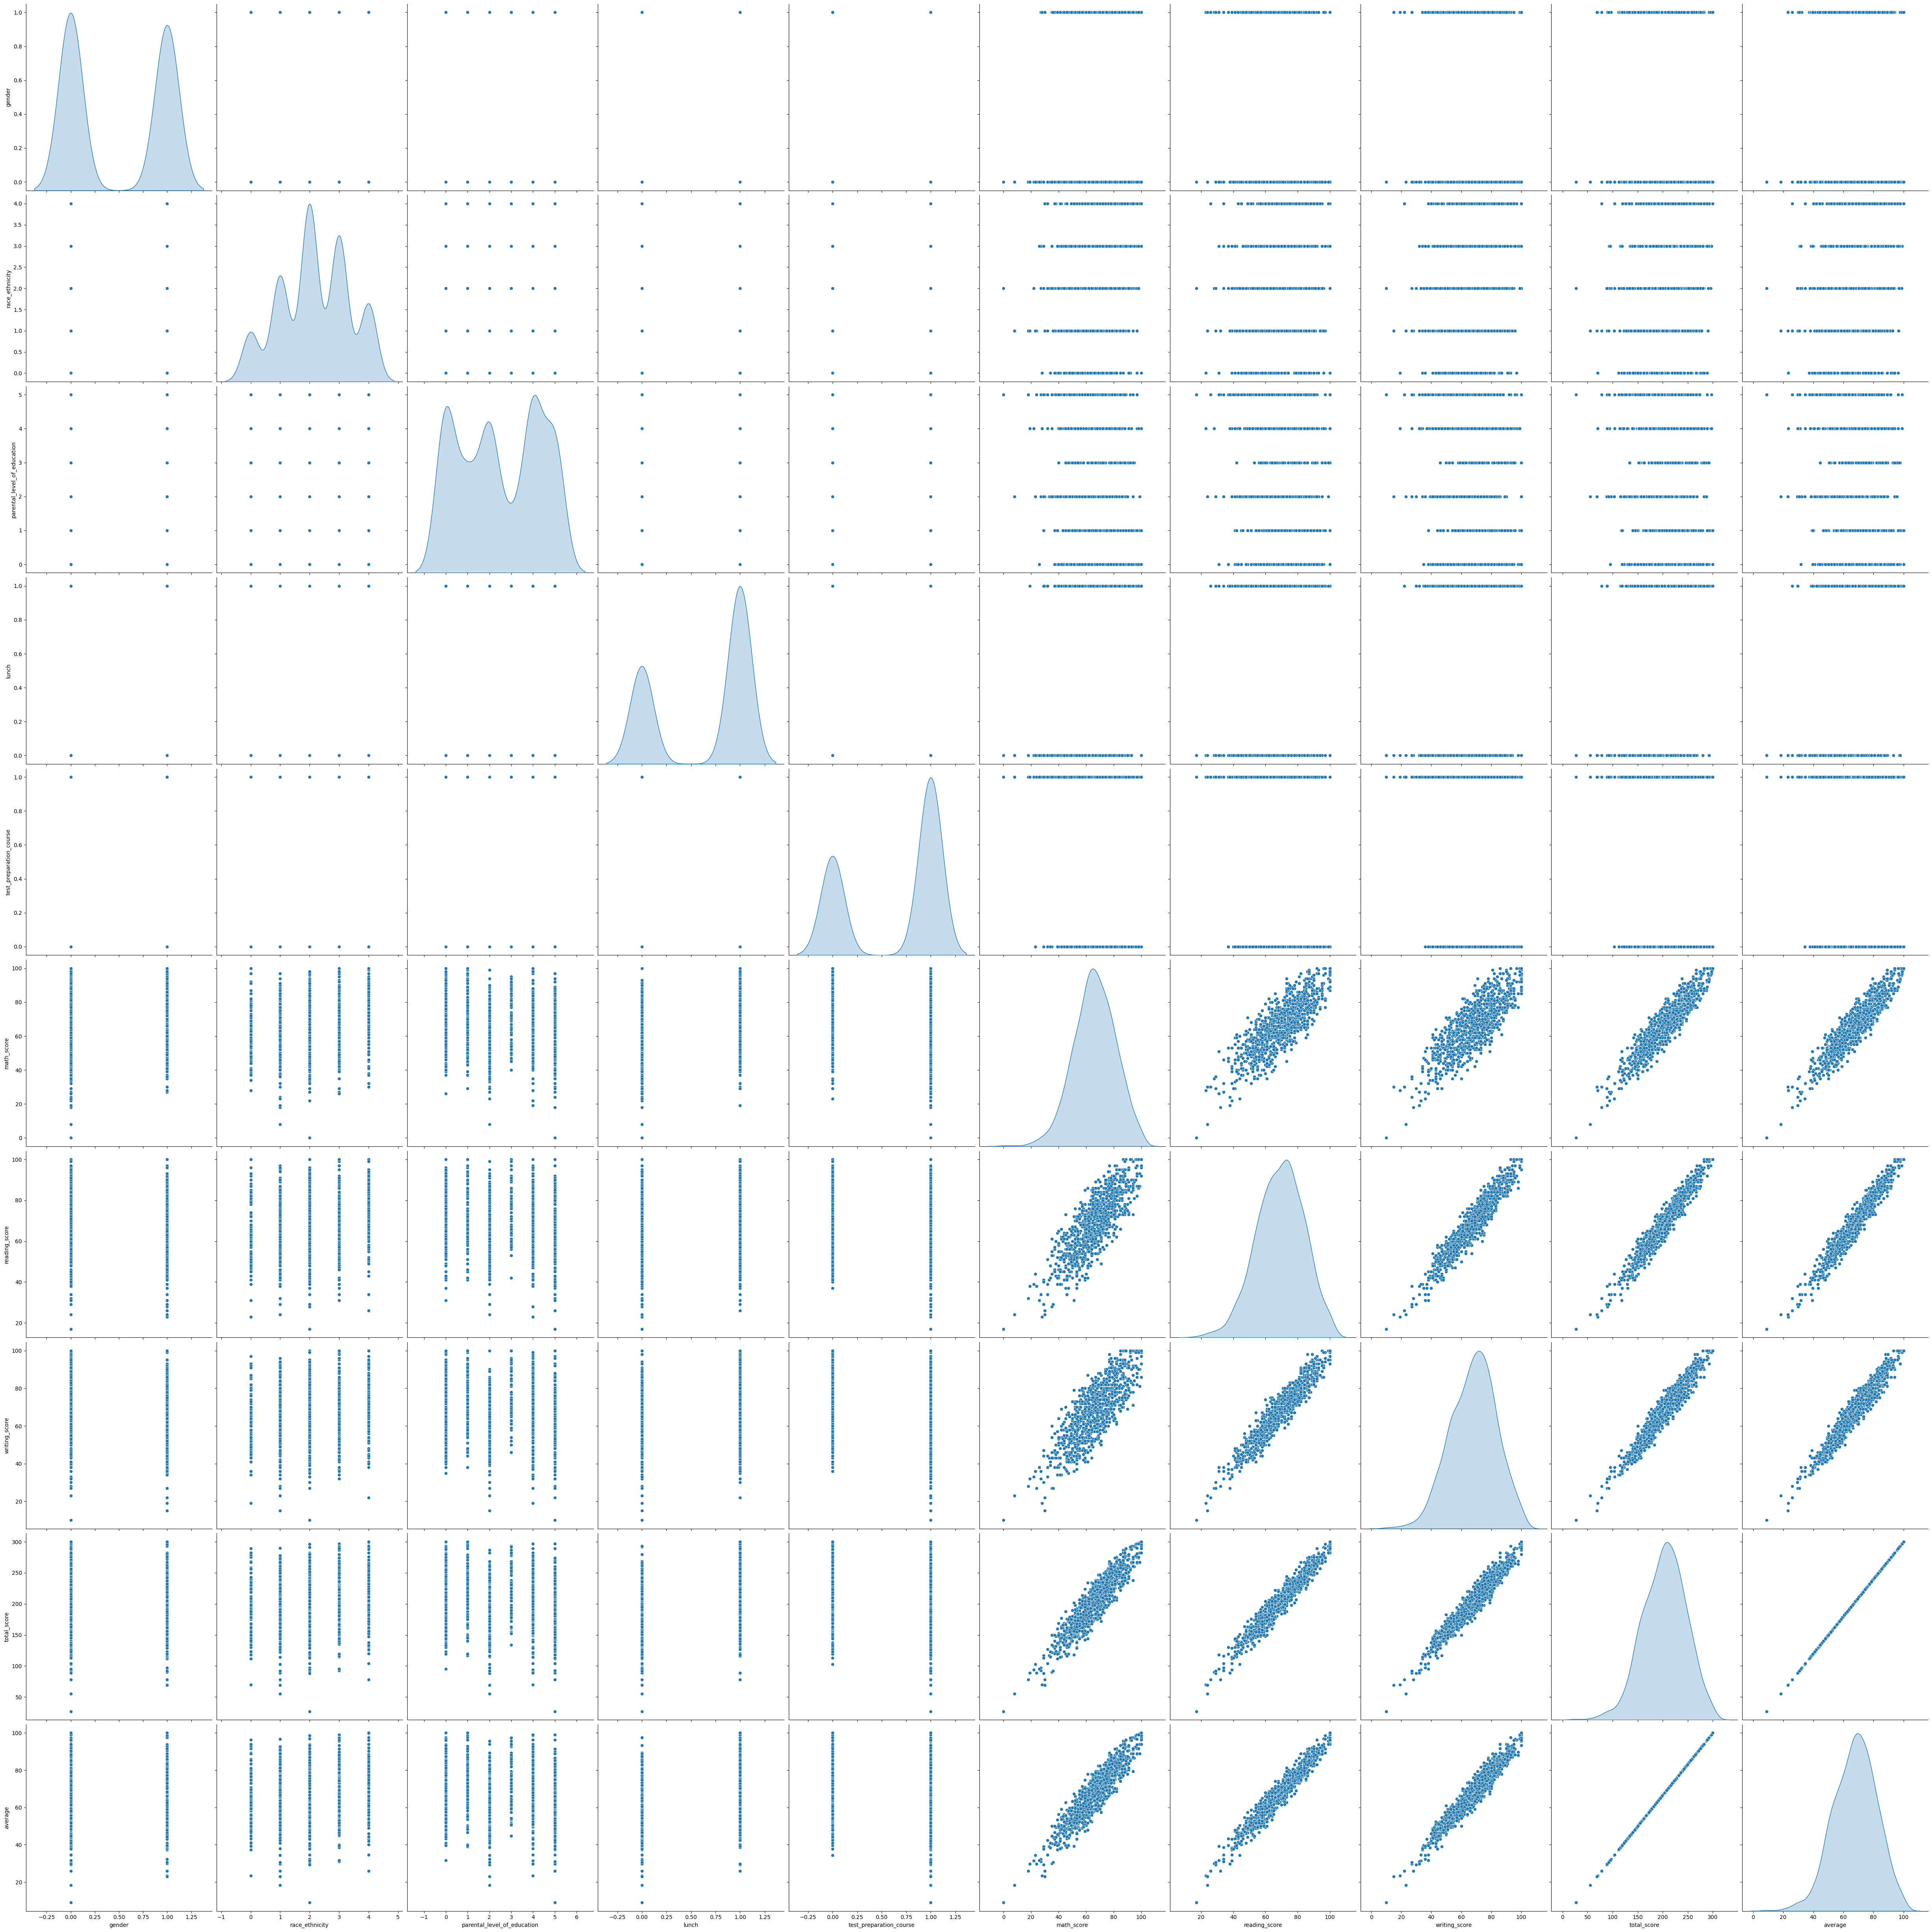

In [46]:
sns.pairplot(df,kind='scatter', height=5,diag_kind='kde')

<ipython-input-47-b9d990957b3f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


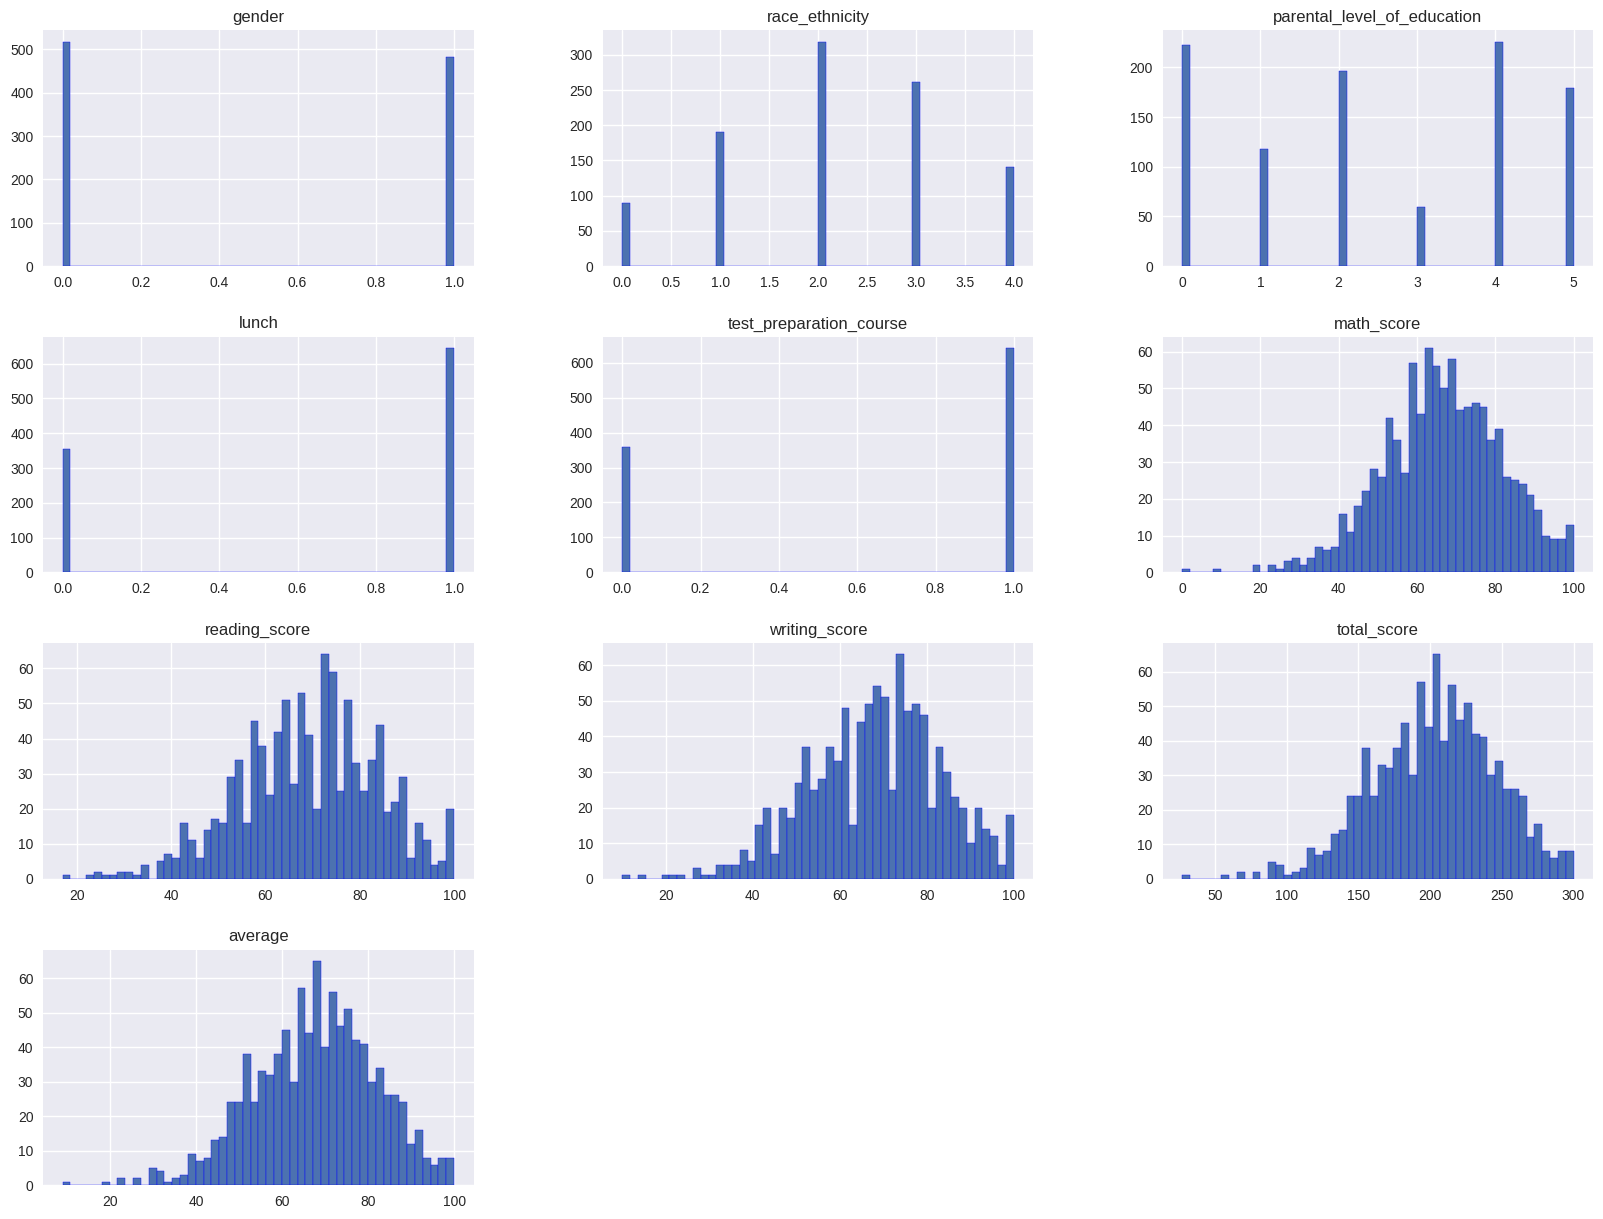

In [47]:
plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [48]:
def barchart(feature,xlabel):
    plt.figure(figsize=[35,7])
    by_feature =  df.groupby([feature], as_index=False)['total_score'].sum()
    ax = sns.barplot(x=feature, y="total_score", data=by_feature[[feature,'total_score']], estimator=sum )
    ax.set(xlabel=xlabel, ylabel='total_score')

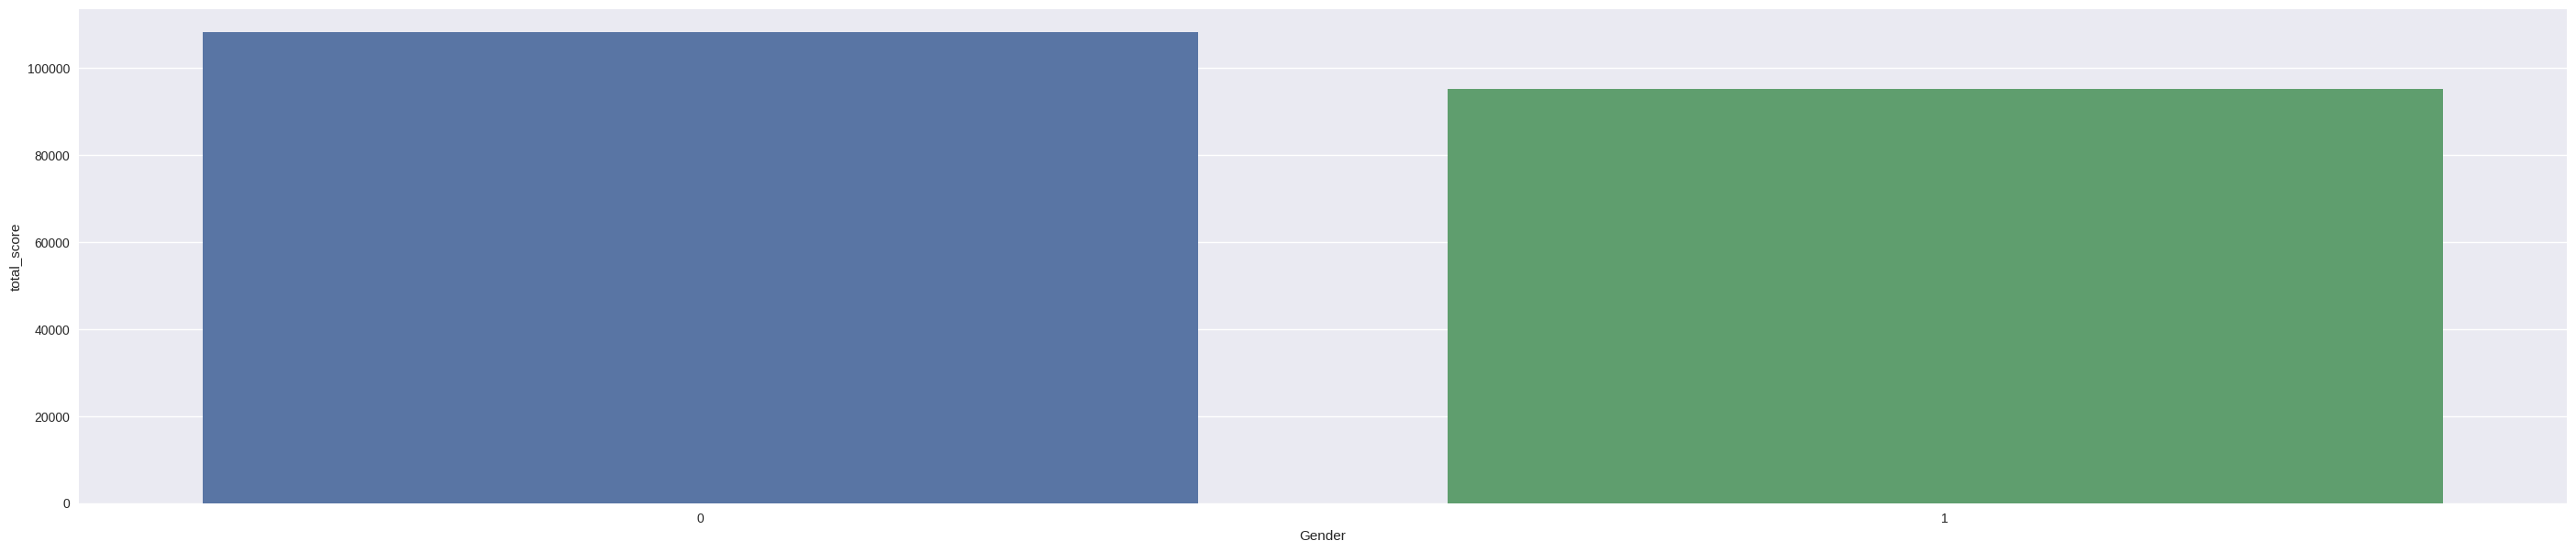

In [49]:
barchart('gender','Gender')

**Female total score has more as compared to male**

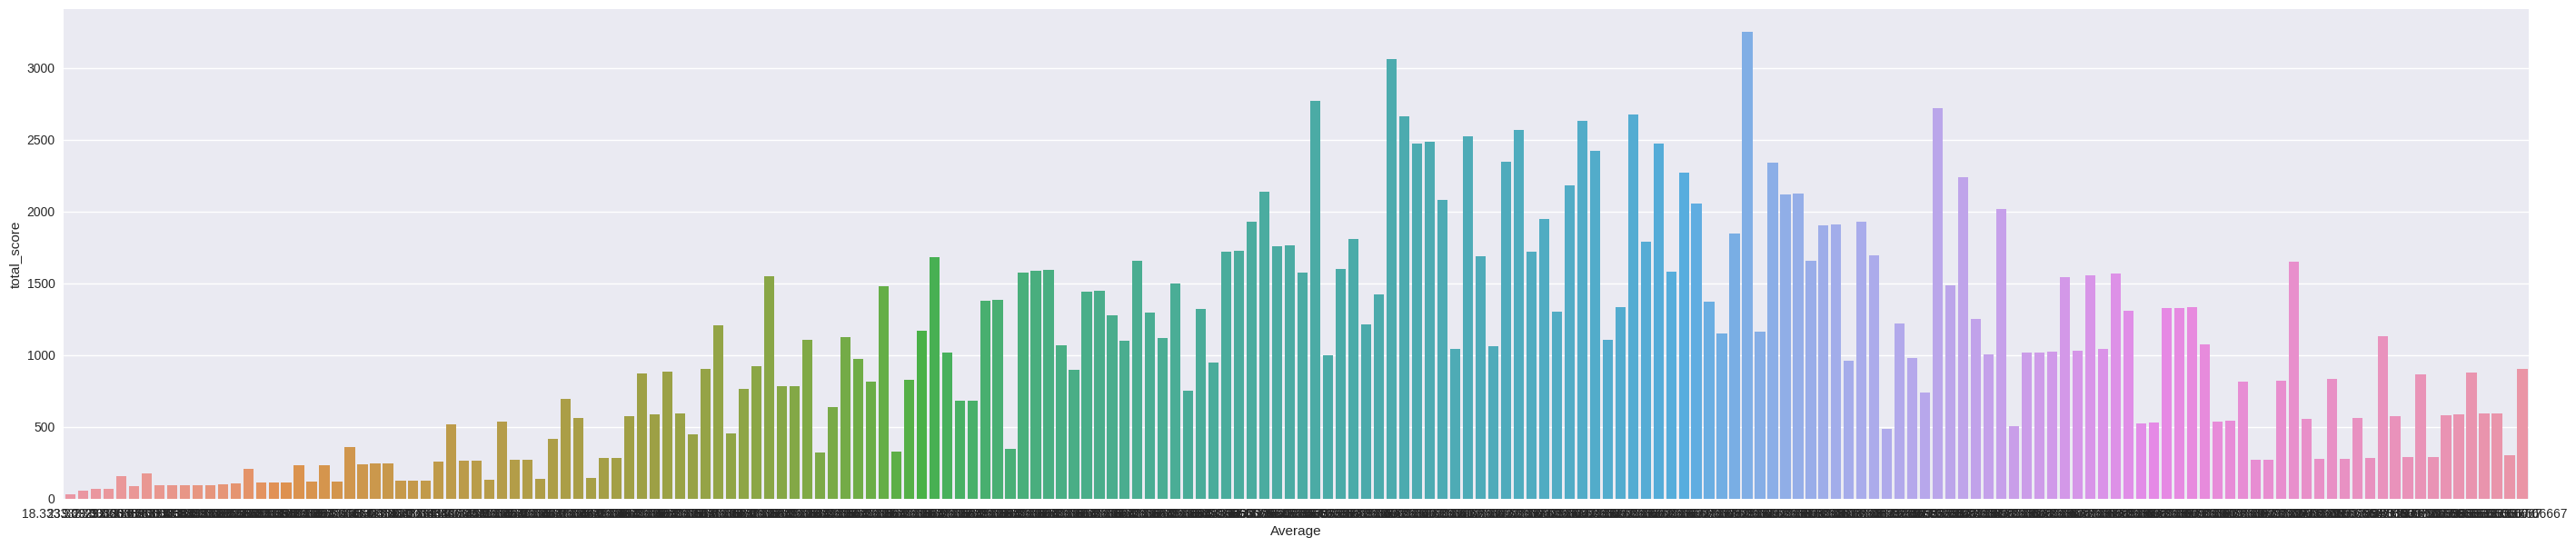

In [50]:
barchart('average','Average')

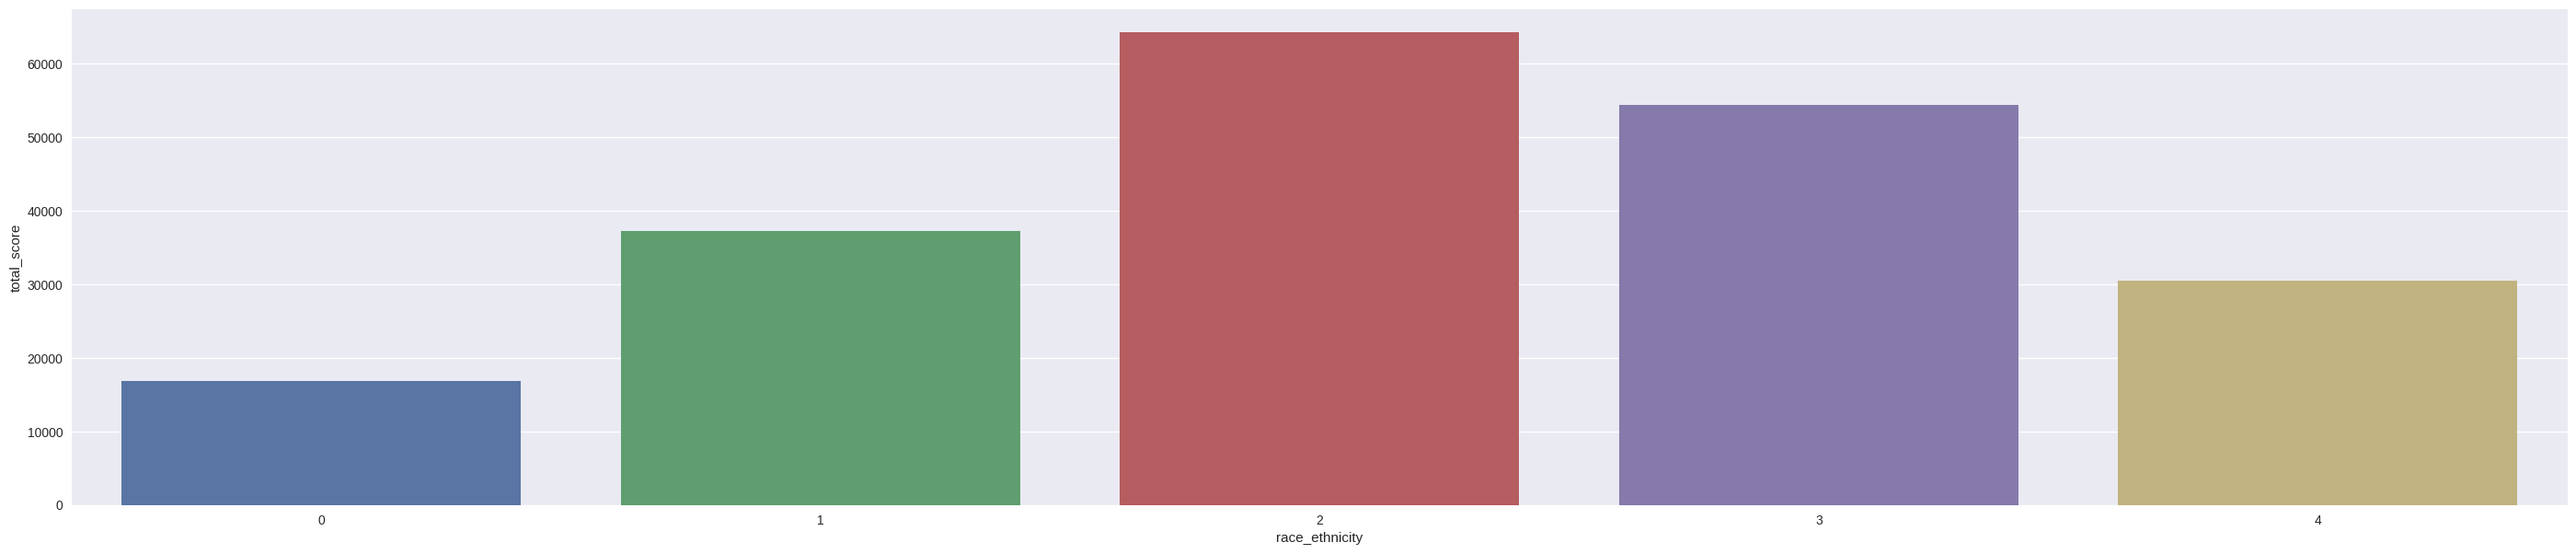

In [51]:
barchart('race_ethnicity','race_ethnicity')

**GROUP C total score is more**

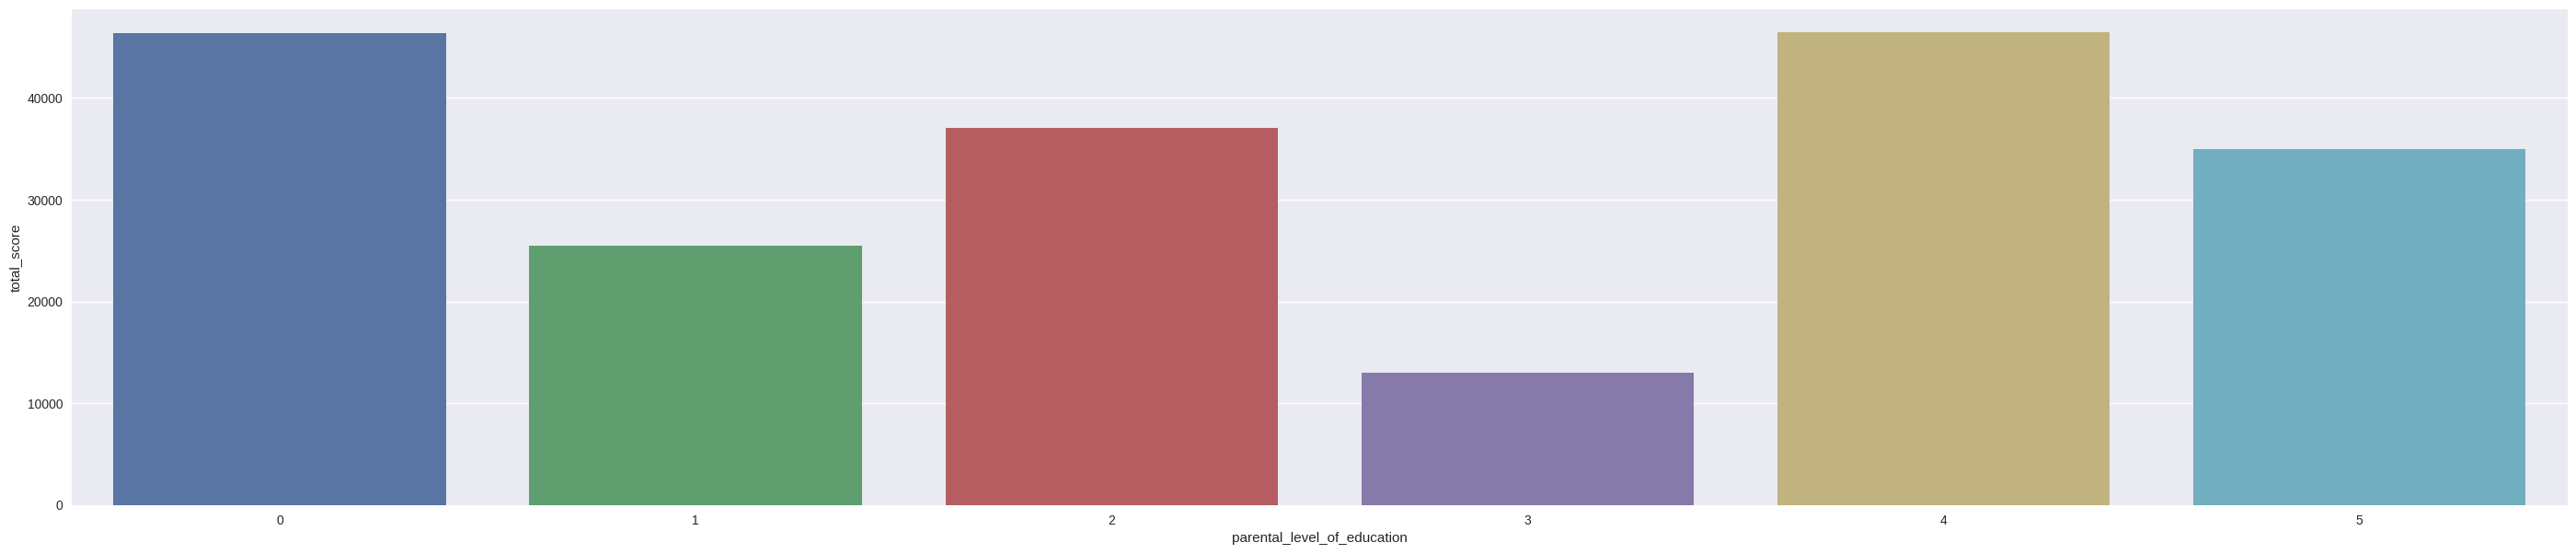

In [52]:
barchart('parental_level_of_education','parental_level_of_education')

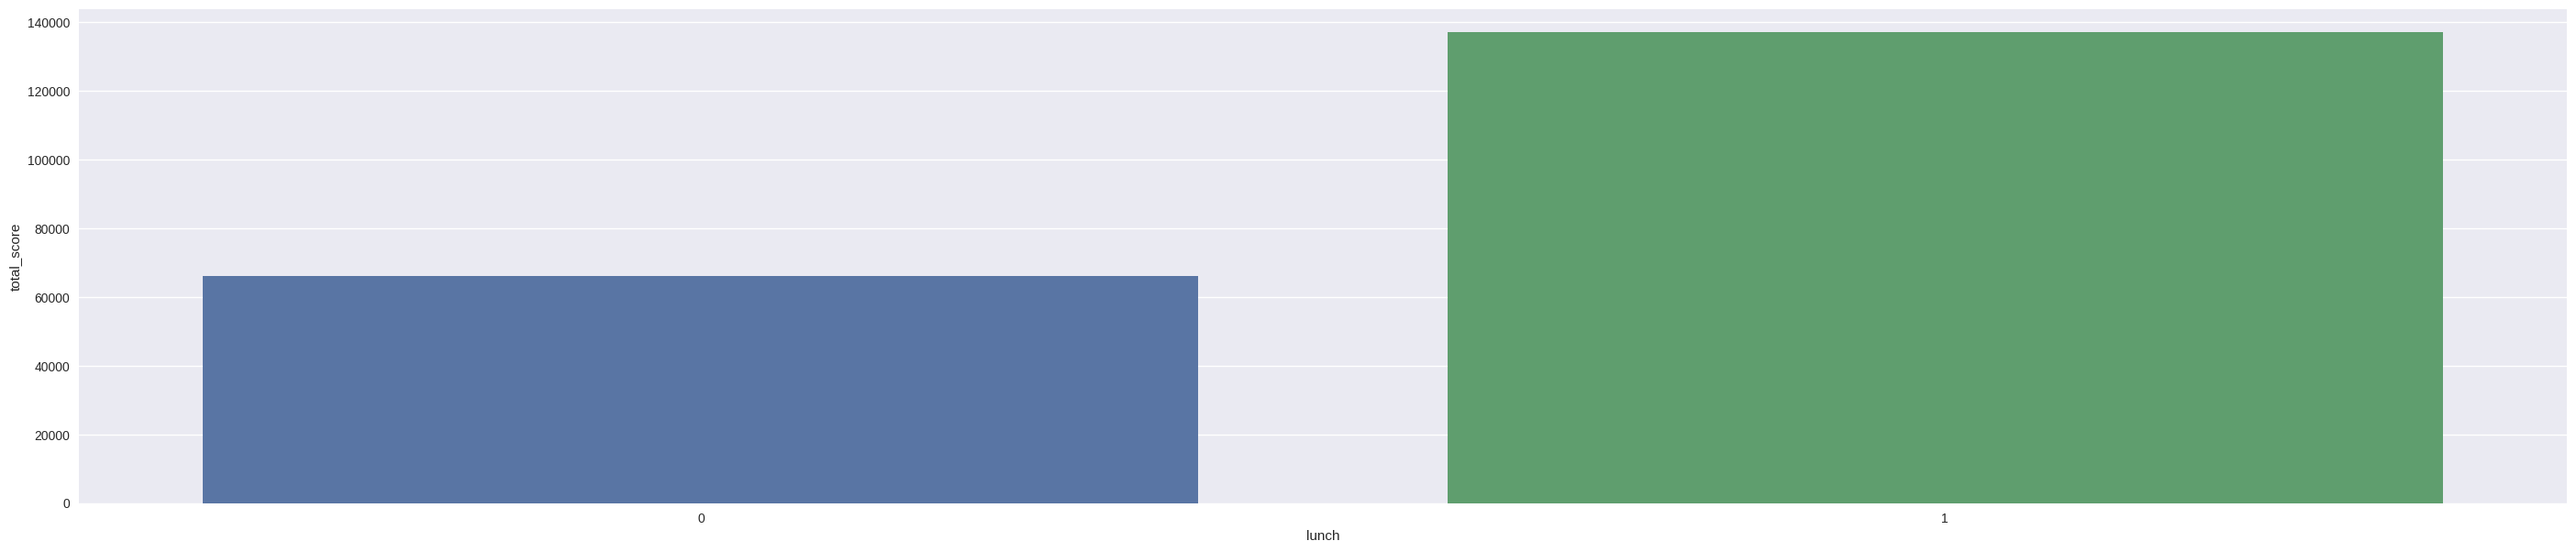

In [53]:
barchart('lunch','lunch')

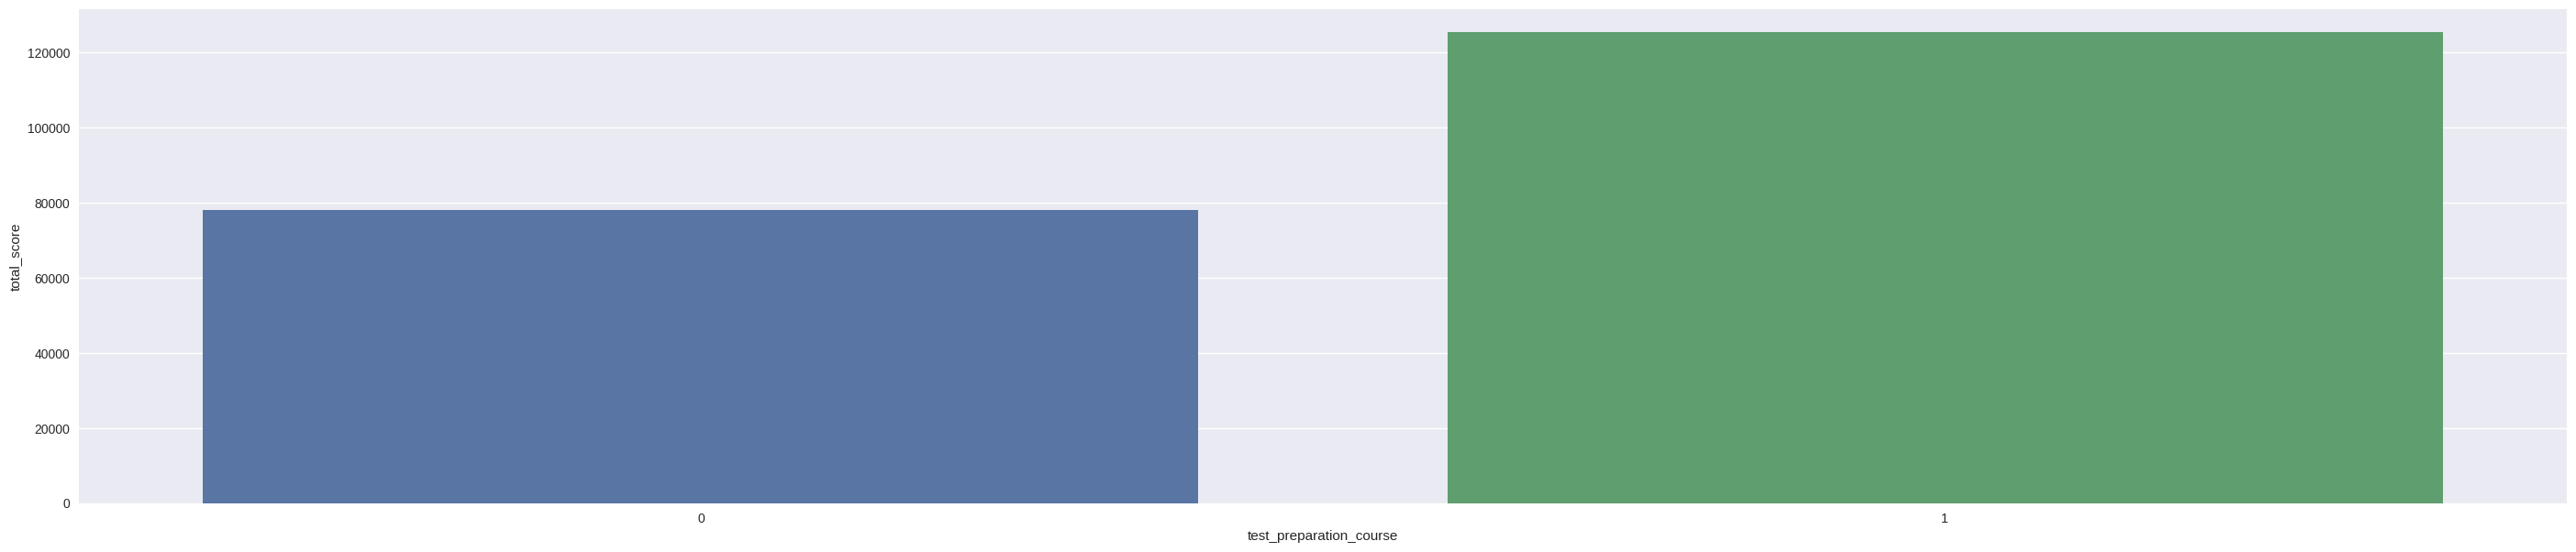

In [54]:
barchart('test_preparation_course','test_preparation_course')

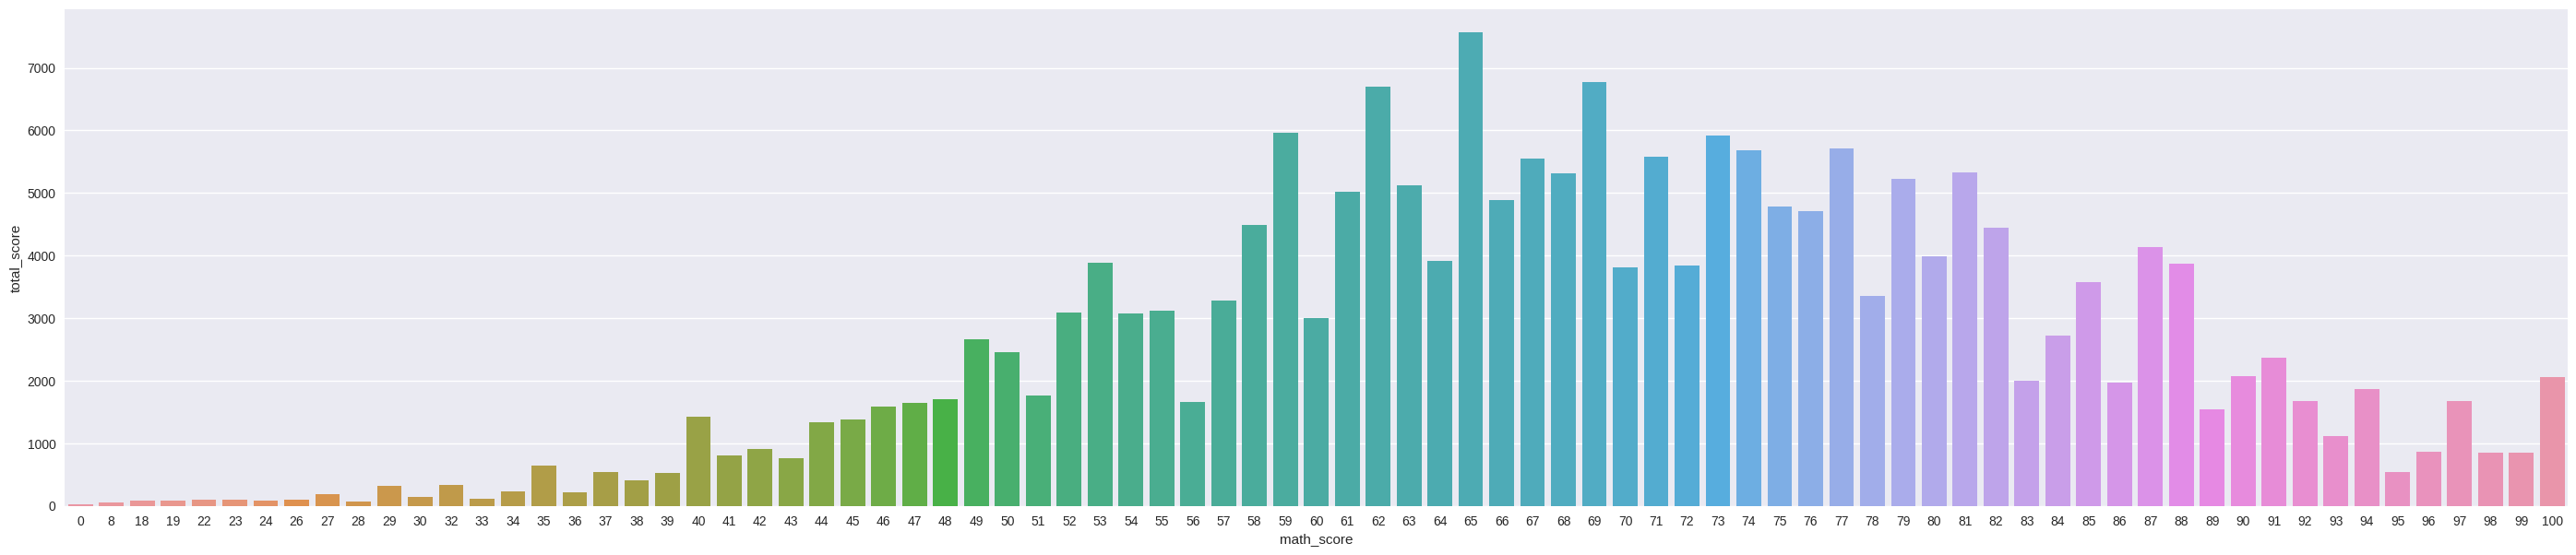

In [55]:
barchart('math_score','math_score')

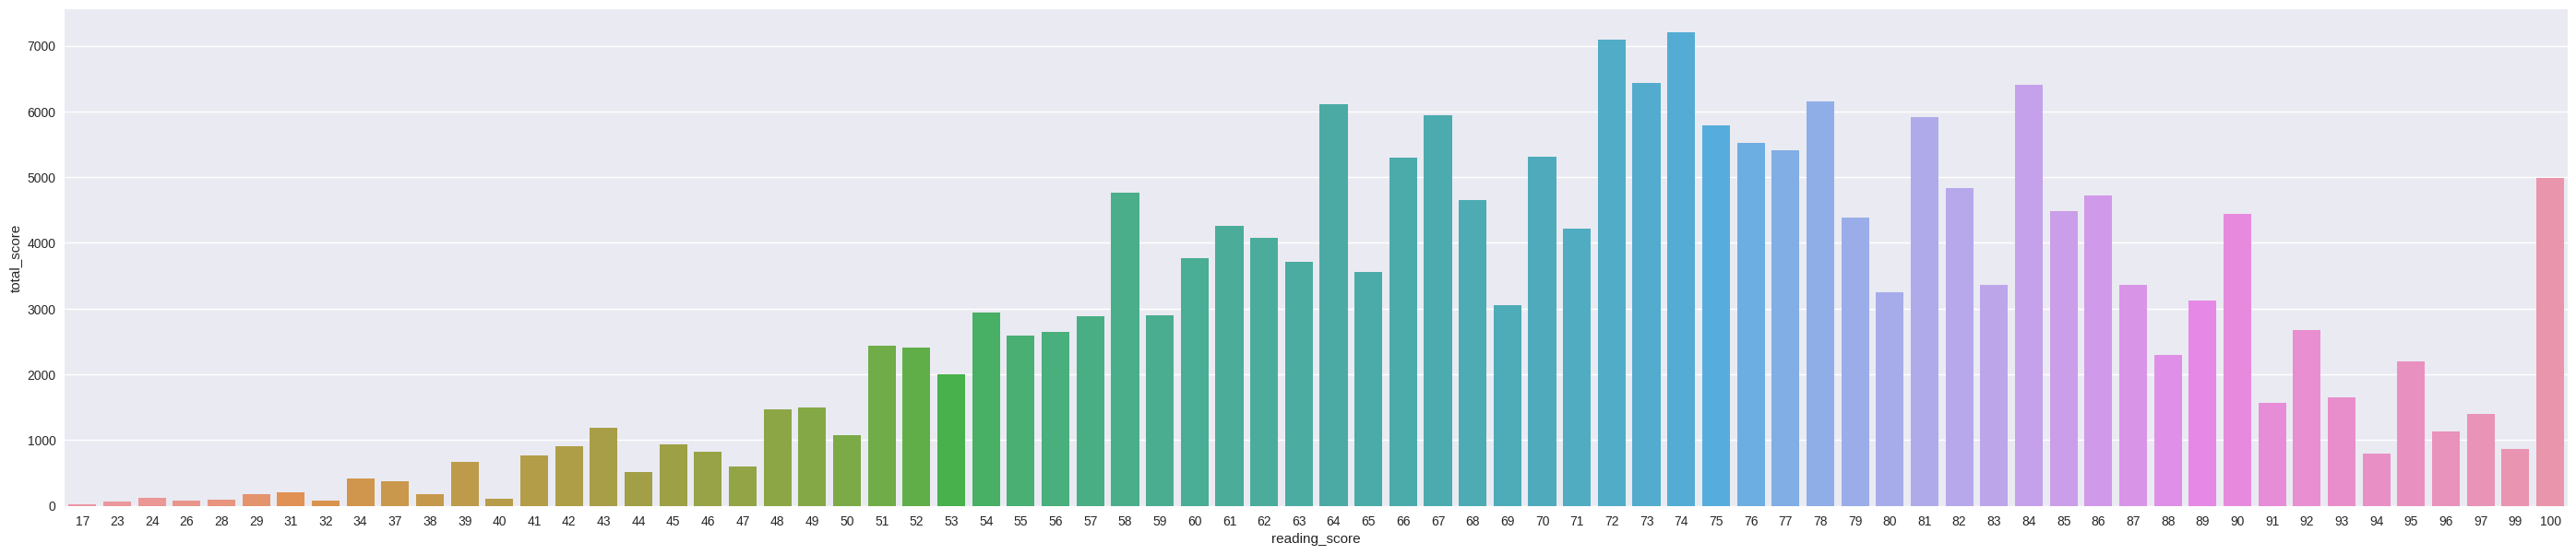

In [56]:
barchart('reading_score','reading_score')

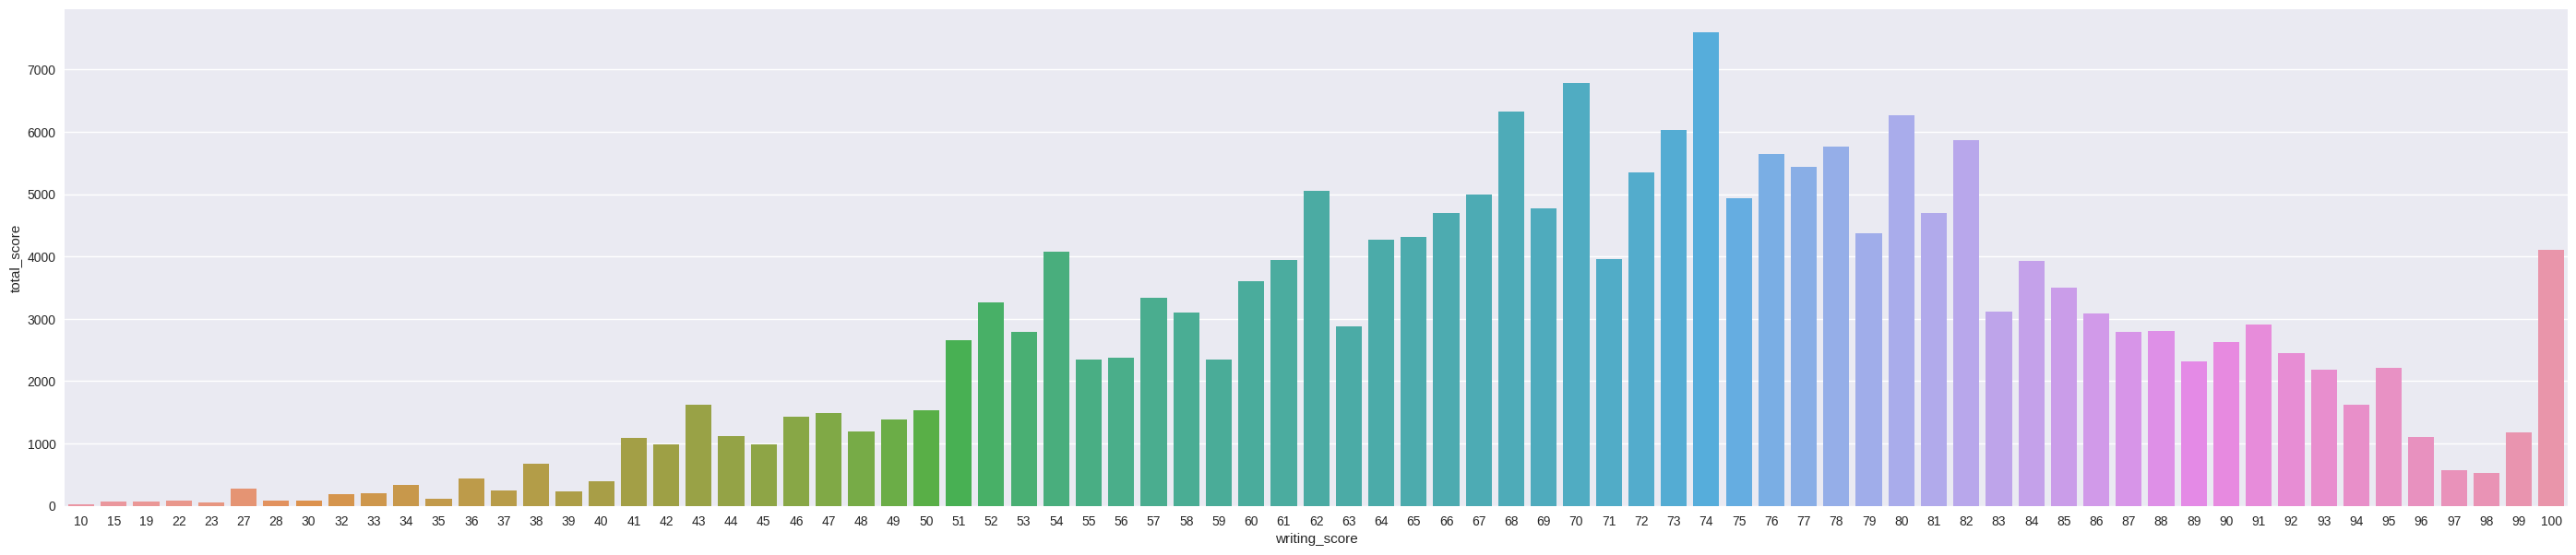

In [57]:
barchart('writing_score','writing_score')

In [58]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

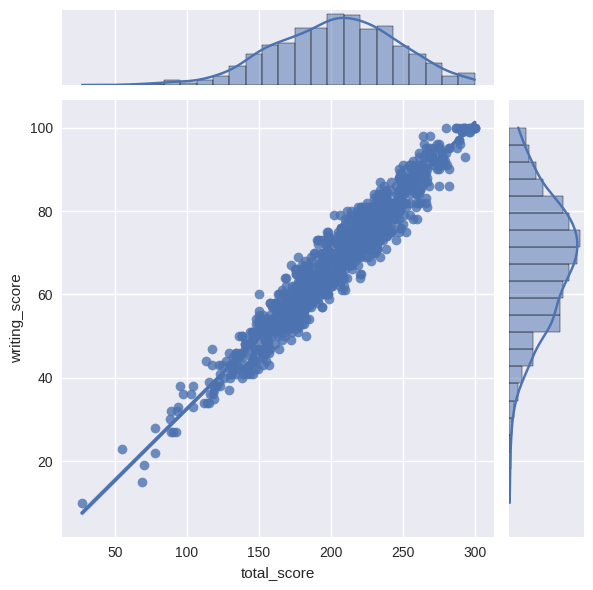

In [59]:
sns.jointplot(x='total_score',y='writing_score',data=df, kind='reg')

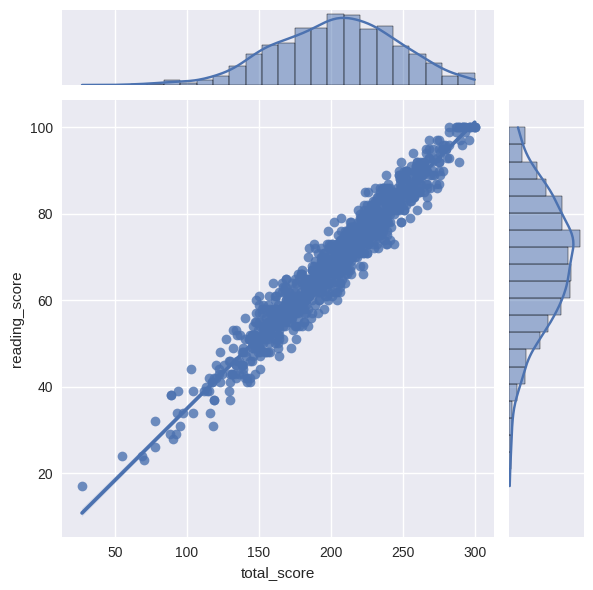

In [60]:
sns.jointplot(x='total_score',y='reading_score',data=df, kind='reg')

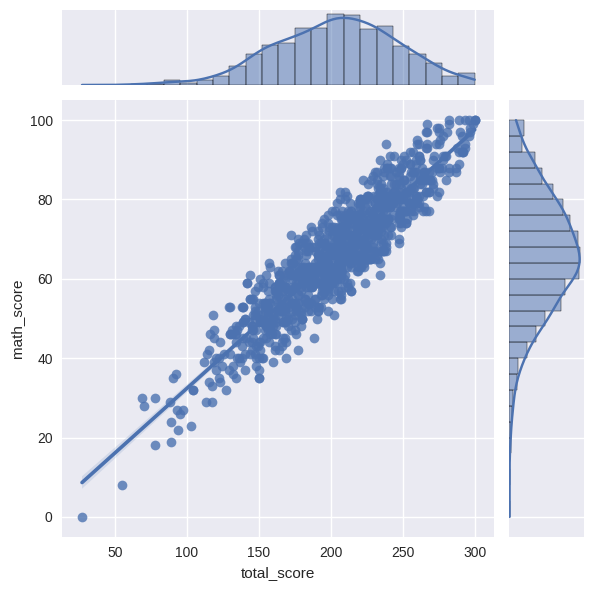

In [61]:
sns.jointplot(x='total_score',y='math_score',data=df, kind='reg')

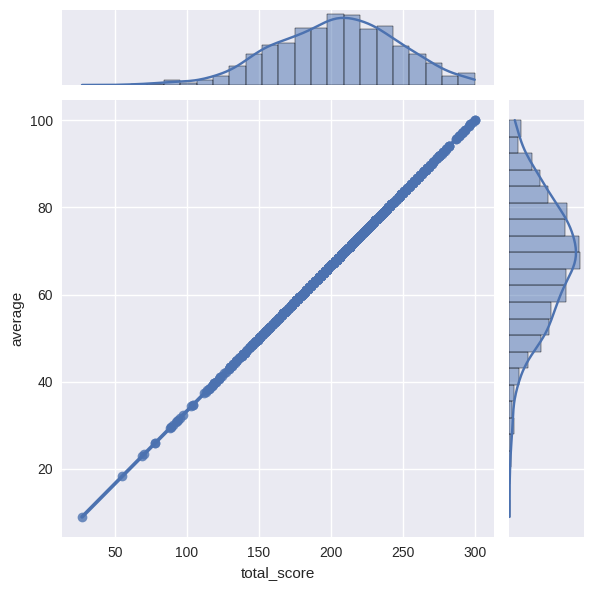

In [62]:
sns.jointplot(x='total_score',y='average',data=df, kind='reg')

# **REPORT**

**Student's Performance is related with lunch, race, parental level education**

**Females lead in pass percentage and also are top-scorers**

**Student's Performance is not much related with test preparation course**

**Finishing preparation course is benefitial**